# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyRegressor
from sklearn.utils import shuffle
from sklearn.tree import plot_tree

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

In [2]:
df = pd.read_csv("../data/am_pm.csv").drop(columns="Unnamed: 0")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     35 non-null     object
 1   am       35 non-null     int64 
 2   pm       35 non-null     int64 
 3   target   35 non-null     object
 4   predict  35 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


,date,am,pm,target,predict
0,2020-04-17,21,2,working_day,weekend
1,2020-04-18,1,68,weekend,working_day
2,2020-04-19,18,15,weekend,working_day
3,2020-04-20,2,23,working_day,working_day
4,2020-04-21,0,25,working_day,working_day


In [3]:
#def h(theta, xi):
#    return 1/(1 + np.exp(-1*np.dot(xi, theta)))

In [4]:
features = df.drop(columns=["date", "target", "predict"])
target = df["target"]
model= LogisticRegression(random_state=21, fit_intercept=False)
model.fit(features , target)
x = np.array([min(df["am"]), max(df["am"])])
print(x)
y = -model.coef_[0][0] / model.coef_[0][1] * x
#y = (-1 / model.coef_[0][1]) * model.coef_[0][0] * x
x
print(model.coef_)
print(model.intercept_)
y

[ 0 91]
[[-0.00038653  0.00298066]]
[0.]


array([ 0.        , 11.80072628])

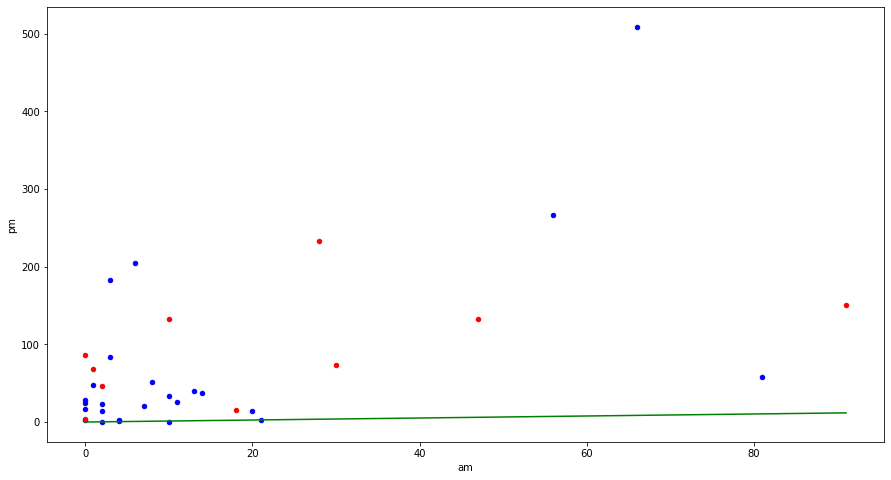

In [5]:
fig, ax = plt.subplots(figsize=(15, 8))
df[df["target"] == "working_day"].plot(kind="scatter", x="am", y="pm", ax=ax, color="b")
df[df["target"] == "weekend"].plot(kind="scatter", x="am", y="pm", ax=ax, color="r")
ax.plot(x, y, color="g")
plt.show()

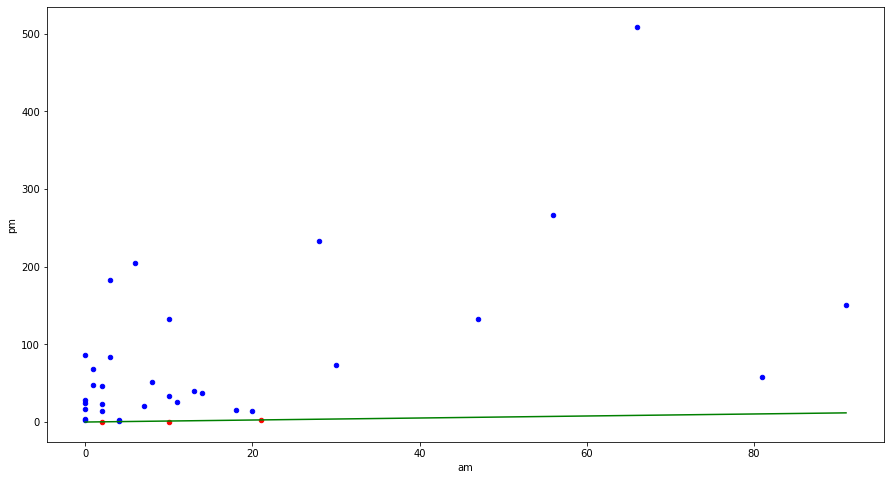

In [6]:
fig, ax = plt.subplots(figsize=(15, 8))
df[df["predict"] == "working_day"].plot(kind="scatter", x="am", y="pm", ax=ax, color="b")
df[df["predict"] == "weekend"].plot(kind="scatter", x="am", y="pm", ax=ax, color="r")
ax.plot(x, y, color="g")
plt.show()

In [7]:
features.head()

,am,pm
0,21,2
1,1,68
2,18,15
3,2,23
4,0,25


## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

In [8]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df[["am", "pm"]])
model= LogisticRegression(random_state=21, fit_intercept=False)
model.fit(features_scaled , target)
df["scaled_predict"] = model.predict(features_scaled)
df.head()

,date,am,pm,target,predict,scaled_predict
0,2020-04-17,21,2,working_day,weekend,working_day
1,2020-04-18,1,68,weekend,working_day,working_day
2,2020-04-19,18,15,weekend,working_day,working_day
3,2020-04-20,2,23,working_day,working_day,working_day
4,2020-04-21,0,25,working_day,working_day,working_day


$
naive = 0.7142857142857143
$

In [9]:
# yes. its better
model.score(features_scaled, target)

0.7428571428571429

In [10]:
df["scaled_am"] = features_scaled[:,0]
df["scaled_pm"] = features_scaled[:,1]

In [11]:
x = np.array([min(df["scaled_am"]), max(df["scaled_am"])])
print(x)
y = -model.coef_[0][0] / model.coef_[0][1] * x
print(x)
print(model.coef_)
print(model.intercept_)
y

[-0.69874402  3.19880362]
[-0.69874402  3.19880362]
[[-0.25396542 -0.07384233]]
[0.]


array([  2.40318552, -11.00162337])

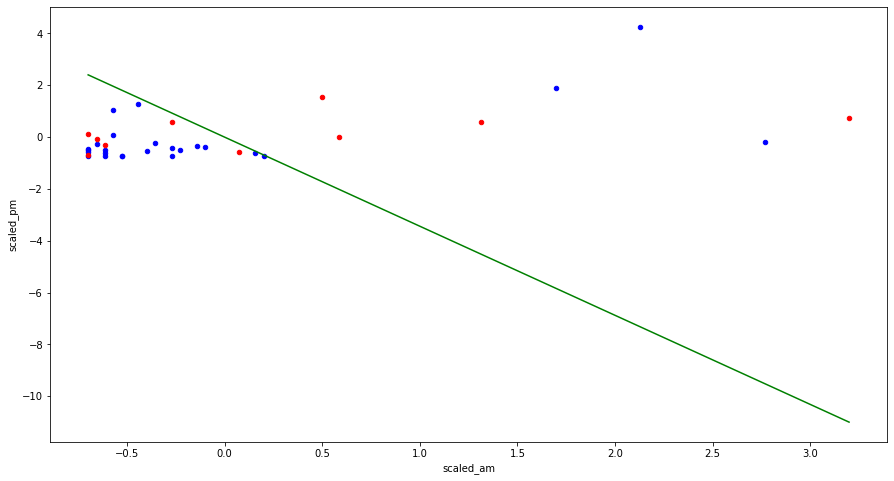

In [12]:
fig, ax = plt.subplots(figsize=(15, 8))
df[df["target"] == "working_day"].plot(kind="scatter", x="scaled_am", y="scaled_pm", ax=ax, color="b")
df[df["target"] == "weekend"].plot(kind="scatter", x="scaled_am", y="scaled_pm", ax=ax, color="r")
ax.plot(x, y, color="g")
plt.show()

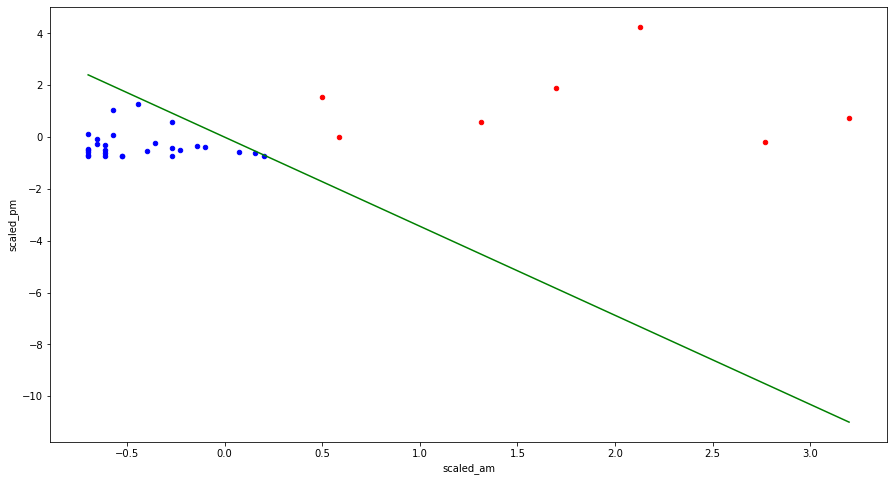

In [13]:
fig, ax = plt.subplots(figsize=(15, 8))
df[df["scaled_predict"] == "working_day"].plot(kind="scatter", x="scaled_am", y="scaled_pm", ax=ax, color="b")
df[df["scaled_predict"] == "weekend"].plot(kind="scatter", x="scaled_am", y="scaled_pm", ax=ax, color="r")
ax.plot(x, y, color="g")
plt.show()

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

In [14]:
df.head()

,date,am,pm,target,predict,scaled_predict,scaled_am,scaled_pm
0,2020-04-17,21,2,working_day,weekend,working_day,0.200690,-0.719904
1,2020-04-18,1,68,weekend,working_day,working_day,-0.655914,-0.071822
2,2020-04-19,18,15,weekend,working_day,working_day,0.072199,-0.592251
3,2020-04-20,2,23,working_day,working_day,working_day,-0.613084,-0.513696
4,2020-04-21,0,25,working_day,working_day,working_day,-0.698744,-0.494057


In [15]:
kernel = ["linear", "poly", "rbf", "sigmoid"]
for k in kernel:
    model = svm.SVC(random_state=21, probability=True, kernel=k)
    model.fit(features_scaled , target)
    #df["svm_predict"] = model.predict(features_scaled)
    print(k, model.score(features_scaled, target))

linear 0.7142857142857143
poly 0.7428571428571429
rbf 0.7428571428571429
sigmoid 0.6857142857142857


In [16]:
model = svm.SVC(random_state=21, probability=True, kernel="rbf")
model.fit(features_scaled , target)
df["svm_predict"] = model.predict(features_scaled)
print("rbf", model.score(features_scaled, target))

rbf 0.7428571428571429


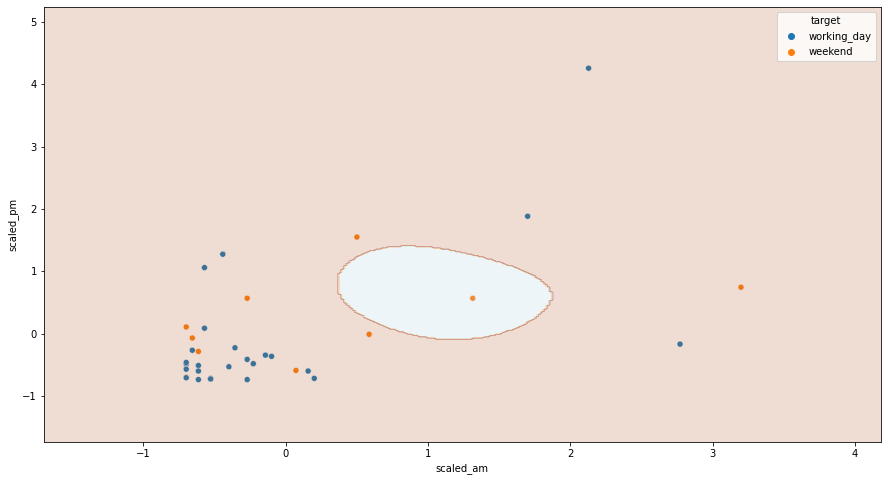

In [17]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=df,  x="scaled_am", y="scaled_pm", hue="target", ax=ax)
xx, yy = np.meshgrid(np.arange(df["scaled_am"].min()-1, df["scaled_am"].max()+1, 0.02), 
                  np.arange(df["scaled_pm"].min()-1, df["scaled_pm"].max()+1, 0.02))
  
plt.subplot(1, 1, 1)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#Z = [(df["predict"] == "working_day").values

Z= [[1 if z =="working_day" else 0 for z in i] for i in list(Z)]
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.show()

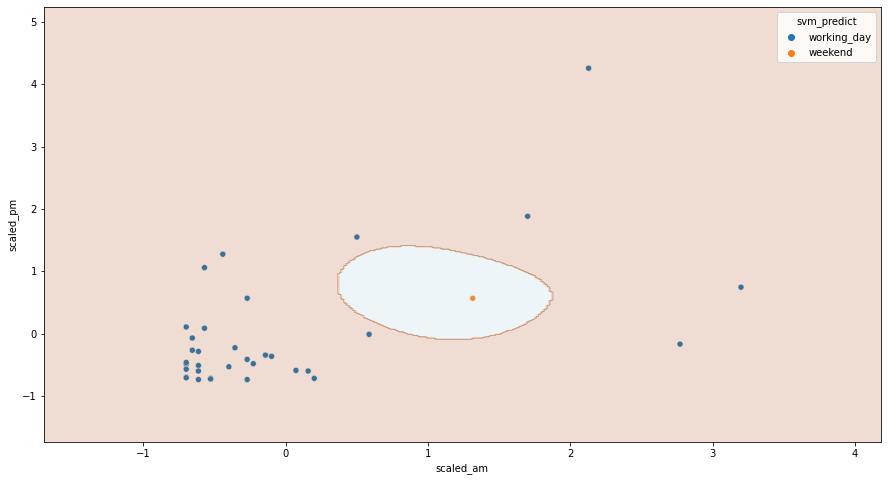

In [18]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=df,  x="scaled_am", y="scaled_pm", hue="svm_predict", ax=ax)
xx, yy = np.meshgrid(np.arange(df["scaled_am"].min()-1, df["scaled_am"].max()+1, 0.02), 
                  np.arange(df["scaled_pm"].min()-1, df["scaled_pm"].max()+1, 0.02))
  
plt.subplot(1, 1, 1)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#Z = [(df["predict"] == "working_day").values

Z= [[1 if z =="working_day" else 0 for z in i] for i in list(Z)]
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.show()

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [19]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)

In [20]:
model.fit(features_scaled , target)
df["tree_predict"] = model.predict(features_scaled)
df.head()

,date,am,pm,target,predict,scaled_predict,scaled_am,scaled_pm,svm_predict,tree_predict
0,2020-04-17,21,2,working_day,weekend,working_day,0.200690,-0.719904,working_day,working_day
1,2020-04-18,1,68,weekend,working_day,working_day,-0.655914,-0.071822,working_day,weekend
2,2020-04-19,18,15,weekend,working_day,working_day,0.072199,-0.592251,working_day,working_day
3,2020-04-20,2,23,working_day,working_day,working_day,-0.613084,-0.513696,working_day,working_day
4,2020-04-21,0,25,working_day,working_day,working_day,-0.698744,-0.494057,working_day,working_day


In [21]:
model.score(features_scaled, target)

0.9428571428571428

In [22]:
for i in range(1, 10):
    model = DecisionTreeClassifier(max_depth=i, random_state=42)
    model.fit(features_scaled , target)
    print(i, model.score(features_scaled, target))
    

1 0.7714285714285715
2 0.8571428571428571
3 0.8857142857142857
4 0.9428571428571428
5 0.9714285714285714
6 1.0
7 1.0
8 1.0
9 1.0


In [23]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(features_scaled , target)


DecisionTreeClassifier(max_depth=4, random_state=42)

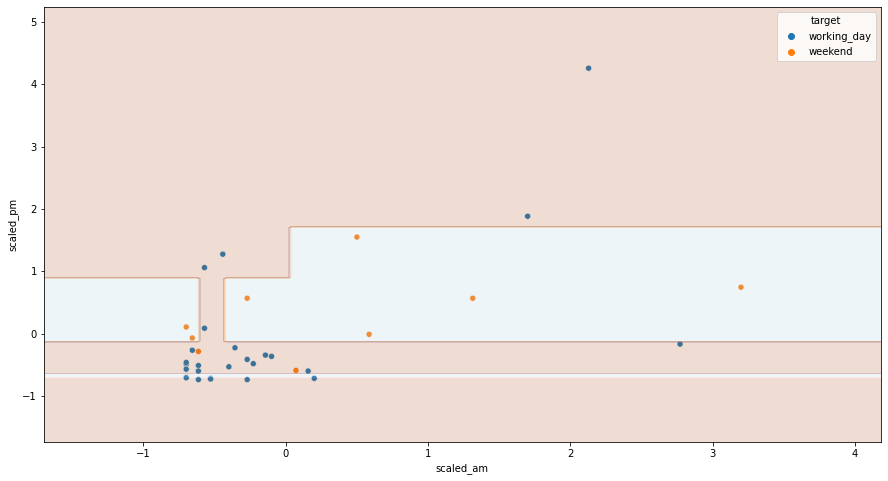

In [24]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=df,  x="scaled_am", y="scaled_pm", hue="target", ax=ax)
xx, yy = np.meshgrid(np.arange(df["scaled_am"].min()-1, df["scaled_am"].max()+1, 0.02), 
                  np.arange(df["scaled_pm"].min()-1, df["scaled_pm"].max()+1, 0.02))
  
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#Z = [(df["predict"] == "working_day").values

Z= [[1 if z =="working_day" else 0 for z in i] for i in list(Z)]
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.show()

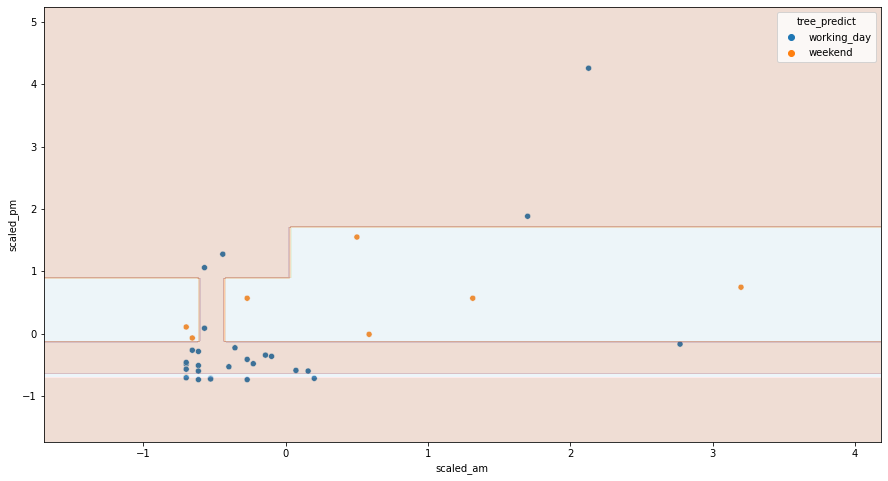

In [25]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=df,  x="scaled_am", y="scaled_pm", hue="tree_predict", ax=ax)
xx, yy = np.meshgrid(np.arange(df["scaled_am"].min()-1, df["scaled_am"].max()+1, 0.02), 
                  np.arange(df["scaled_pm"].min()-1, df["scaled_pm"].max()+1, 0.02))
  
plt.subplot(1, 1, 1)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#Z = [(df["predict"] == "working_day").values

Z= [[1 if z =="working_day" else 0 for z in i] for i in list(Z)]
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.show()

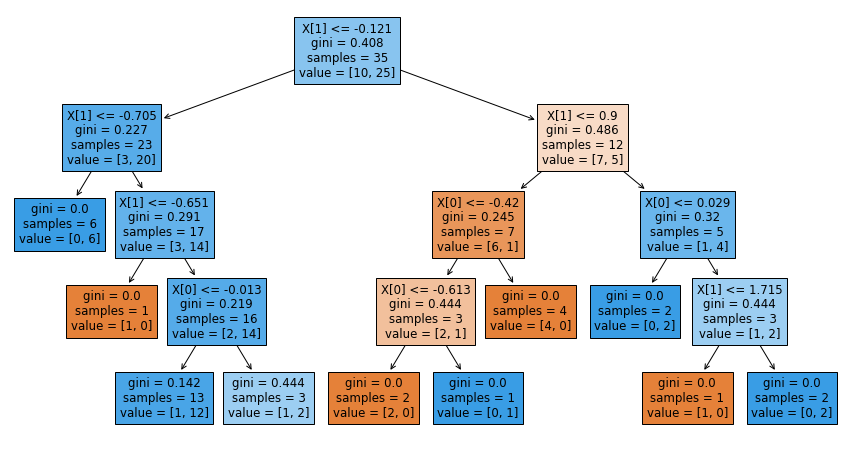

In [26]:
plt.figure(figsize=(15, 8))
plot_tree(model, filled=True);

Answer: 4 leaves